In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [31]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and 
# copy the path for the csv file
data = pd.read_csv("fraudulent_creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
print(data.shape)
print(data.describe())
# Check for missing values
print(data.isnull().sum())

(1000, 30)
                V1           V2           V3           V4           V5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.015806    -0.020828     0.009398     0.017281     0.011704   
std       0.981596     1.002693     1.034051     1.002181     1.006993   
min      -3.334893    -3.212954    -3.321115    -3.010523    -3.241514   
25%      -0.641813    -0.711288    -0.713780    -0.681645    -0.665877   
50%       0.029289    -0.003243     0.019635    -0.041404    -0.012506   
75%       0.689409     0.650518     0.711657     0.702673     0.670022   
max       3.098299     2.985259     3.285724     3.529055     3.611350   

                V6           V7           V8           V9          V10  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.022574     0.024479     0.007572     0.045513     0.018749  ...   
std       0.986991     0.994438     0.985773     0.985122     0.976663  ...   
min   

In [33]:
# Class distribution
print(data['Class'].value_counts())

Class
0    697
1    303
Name: count, dtype: int64


In [34]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.4347202295552367
Fraud Cases: 303
Valid Transactions: 697


In [35]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     303.000000
mean      956.665498
std       577.912063
min         1.763454
25%       473.756468
50%       910.866532
75%      1459.347708
max      1991.164530
Name: Amount, dtype: float64

In [36]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count     697.000000
mean      999.106660
std       576.066319
min         0.360078
25%       506.514539
50%      1001.270592
75%      1497.509237
max      1997.675523
Name: Amount, dtype: float64

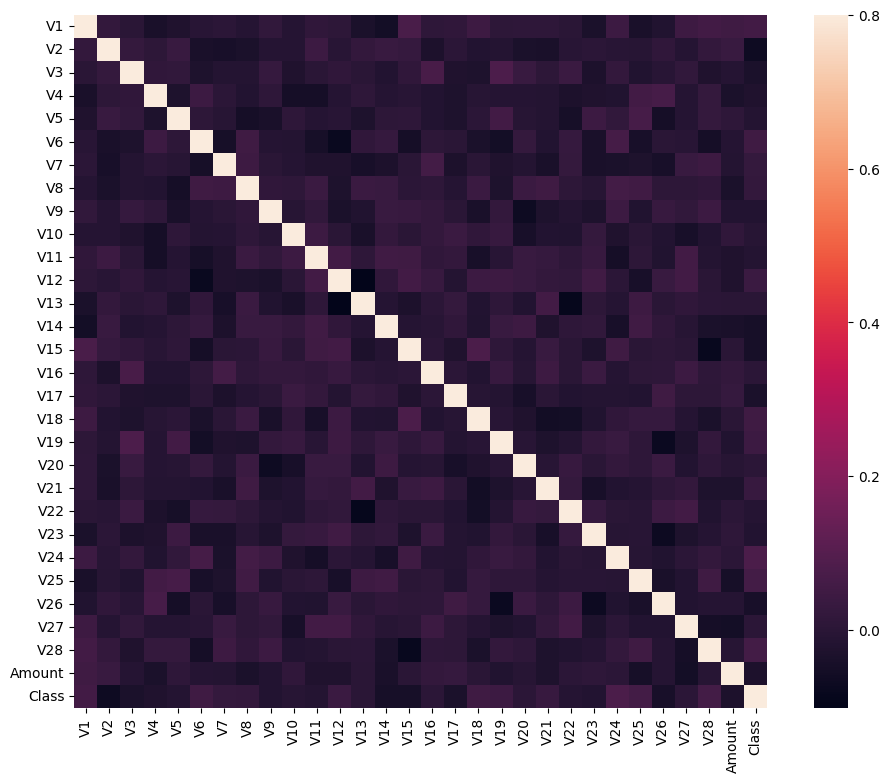

In [37]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [38]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(1000, 29)
(1000,)


In [39]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [40]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [41]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.71
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is-0.06267511942419625


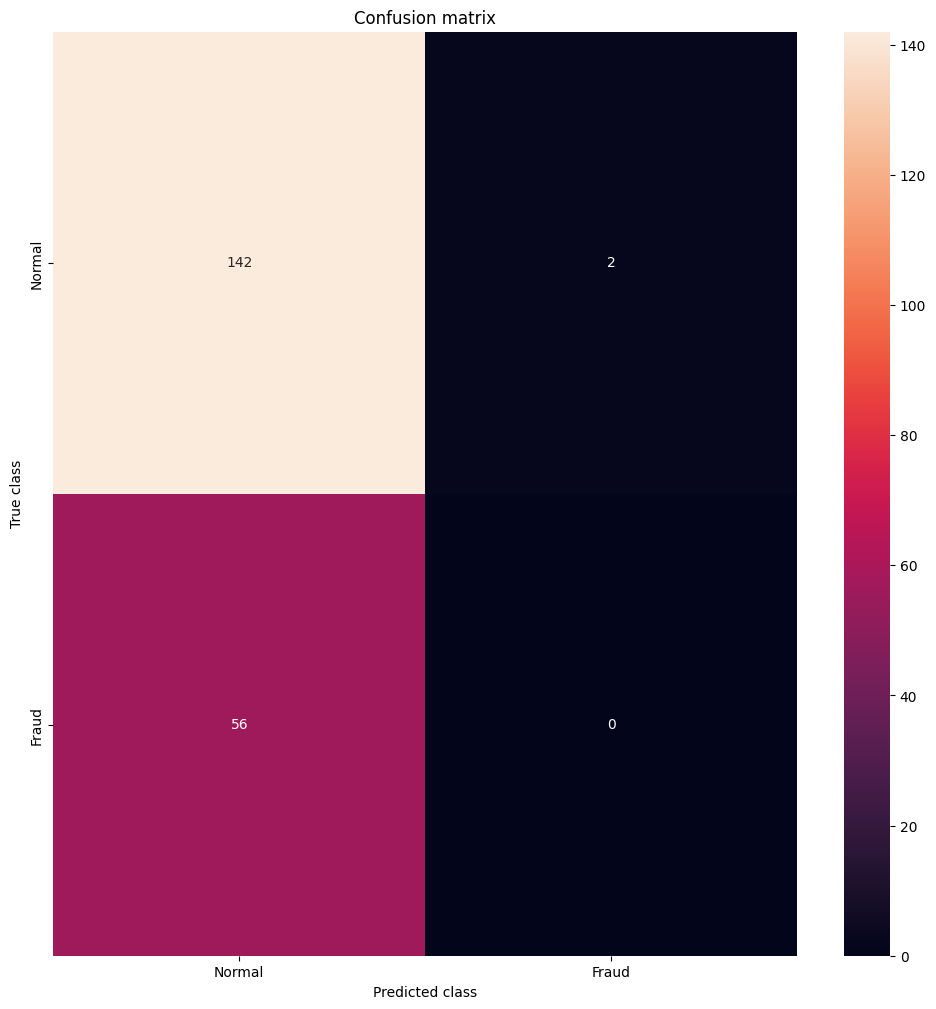

In [42]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [27]:
import joblib

# Save the model
joblib.dump(rfc, 'credit_fraud_model1.pkl')

# To load the model later
rfc = joblib.load('credit_fraud_model1.pkl')


In [29]:
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


[[56862     2]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

[[142   2]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       144
           1       0.00      0.00      0.00        56

    accuracy                           0.71       200
   macro avg       0.36      0.49      0.42       200
weighted avg       0.52      0.71      0.60       200



In [44]:
if yPred ==0:
  print("You are healthy")
else:
  print("Consult with doctor")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()